<a href="https://colab.research.google.com/github/ezorigo/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [4]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def variance(data, sample=1):
  mean = sum(data)/len(data)
  distance_squared = list(map(lambda x: (x - mean)**2, data))
  if sample == 1:
    varianceofdata = sum(distance_squared)/(len(data) - 1)
    return varianceofdata
  if sample == 0: 
    varianceofdata = sum(distance_squared)/len(data)
    return varianceofdata
  else: 
    print("for 'sample=' you can only input a 1 or a 0 \n1 calculates sample variance and 0 calculates population variance")


variance(sales, sample=0)

183761.06122448976

In [16]:
# import pandas as pd
# import numpy as np

# sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# def meanofdata(data):
#   return sum(data) / len(data)

# def varianceofdata(data, sample=1):
#   if sample == 0:
#     variance_data = {'x': data}
#     variance_df = pd.DataFrame(variance_data)
#     v1_mean = meanofdata(variance_df['x'])
#     variance_df['distance_squared'] = (variance_df['x'] - v1_mean)**2
#     variance = variance_df['distance_squared'].sum()/len(data)
#     return variance
#   if sample == 1:
#     variance_data = {'x': data}
#     variance_df = pd.DataFrame(variance_data)
#     v1_mean = meanofdata(variance_df['x'])
#     variance_df['distance_squared'] = (variance_df['x'] - v1_mean)**2
#     variance = variance_df['distance_squared'].sum()/(len(data) - 1)
#     return variance
#   else: 
#     print("for 'sample=' you can only input a 1 or a 0 \n1 calculates sample variance and 0 calculates population variance")

# print(varianceofdata(sales, sample=0))
# np.var(sales)

183761.06122448976


183761.06122448976

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [16]:
customers = [127, 80, 105, 92, 120, 115, 93]

def cov(x, y, sample=1):
  import pandas as pd
  def meanofdata(data):
    return sum(data)/len(data)
  if sample == 1:
    covariance_data = {'x': x, 'y': y}
    covariance_df = pd.DataFrame(covariance_data)
    x_mean = meanofdata(covariance_df['x'])
    y_mean = meanofdata(covariance_df['y'])
    covariance_df['distancex'] = (covariance_df['x'] - x_mean)
    covariance_df['distancey'] = (covariance_df['y'] - y_mean)
    covariance_df['distanceproduct'] = covariance_df['distancex']*covariance_df['distancey']
    covariance = covariance_df['distanceproduct'].sum()/(len(x) - 1)
    return covariance
  if sample == 0:
    covariance_data = {'x': x, 'y': y}
    covariance_df = pd.DataFrame(covariance_data)
    x_mean = meanofdata(covariance_df['x'])
    y_mean = meanofdata(covariance_df['y'])
    covariance_df['distancex'] = (covariance_df['x'] - x_mean)
    covariance_df['distancey'] = (covariance_df['y'] - y_mean)
    covariance_df['distanceproduct'] = covariance_df['distancex']*covariance_df['distancey']
    covariance = covariance_df['distanceproduct'].sum()/(len(x))
    return covariance
  else: 
    print("for 'sample=' you can only input a 1 or a 0 \n1 calculates sample covariance and 0 calculates population covariance")

import numpy as np
print(cov(sales, customers, sample=1))
np.cov(sales, customers, ddof=1)

7604.357142857142


array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [62]:
print(cov(sales, customers, sample=0))
np.cov(sales, customers, ddof=0)

6518.020408163265


array([[183761.06122449,   6518.02040816],
       [  6518.02040816,    249.3877551 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [104]:
def stddev(data, sample=1):
  import math
  if sample == 1:
    stddev_data = {'x': data}
    stddev_df = pd.DataFrame(stddev_data)
    x_mean = meanofdata(stddev_df['x'])
    stddev_df['distance_squared'] = (stddev_df['x'] - x_mean)**2
    variance = stddev_df['distance_squared'].sum()/(len(data) - 1)
    stddev_ = math.sqrt(variance)
    return stddev_
  if sample == 0:
    stddev_data = {'x': data}
    stddev_df = pd.DataFrame(stddev_data)
    x_mean = meanofdata(stddev_df['x'])
    stddev_df['distance_squared'] = (stddev_df['x'] - x_mean)**2
    variance = stddev_df['distance_squared'].sum()/len(data)
    stddev_ = math.sqrt(variance)
    return stddev_
  else:
    print("for 'sample=' you can only input a 1 or a 0 \n1 calculates sample standard deviation and 0 calculates population standard deviation")

print(stddev(sales))
np.std(sales, ddof=1)

463.0204150595357


463.0204150595357

In [68]:
print(stddev(customers))
np.std(customers)

15.792015549069118


15.792015549069118

In [106]:
def corrcoef(x, y):
  return cov(x, y) / ( stddev(x, sample=1) * stddev(y, sample=1) )

print(corrcoef(sales, customers))
np.corrcoef(sales, customers)

0.9628339778148909


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df = df.select_dtypes(['float64', 'int64'])

print(df.shape)
df.head()

(1310, 9)


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [132]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [133]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

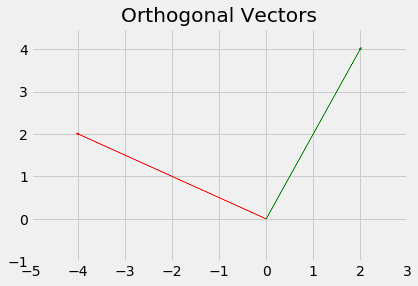

In [18]:
# perpendicular

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

vector_1 = [-4, 2]
vector_2 = [2, 4]

plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-5,3)          
plt.ylim(-1,4.5)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [156]:
(-5*3*7)+(6*-8*2) == 0 

False

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [169]:
np_c = np.mat('2 -15 6 20')
np_c2 = np_c

print(np.linalg.norm(np_c)**2)

665.0


In [177]:
print(np.multiply(np_c, np_c).sum())
np.multiply(np_c, np_c)

665


matrix([[  4, 225,  36, 400]])

In [194]:
np_ctc = np.multiply(np_c.T, np_c)
print(np.diagonal(np_ctc).sum())
np.diagonal(np_ctc)

665


array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

<!-- 
$\left \| d \right \| = \sqrt{7^{2} + 12^{2}} = \sqrt{49 + 144} = \sqrt{193}$


$\left \| e \right \| = \sqrt{2^{2} + 11^{2} + -8^{2}} = \sqrt{4 + 121 + 64} = \sqrt{189}$ -->

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0  \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8 \hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [203]:
np_f = np.mat('4 12 11 9 2')
f_hat = (1/np.linalg.norm(np_f))*np_f
f_hat

matrix([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

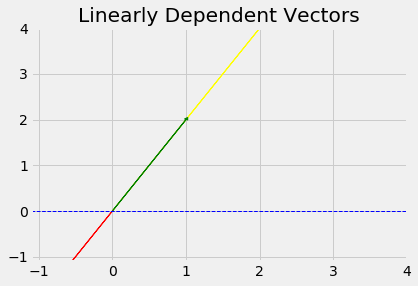

In [218]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,2] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=1, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=1, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=1, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

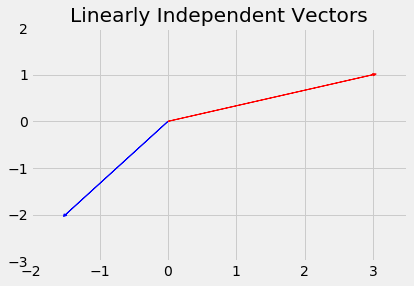

In [219]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-3,2)

# Original Vector
a = [-1.5,-2] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=1, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=1, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# these vectors span R^1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# {𝑙,𝑚,𝑛} spans R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



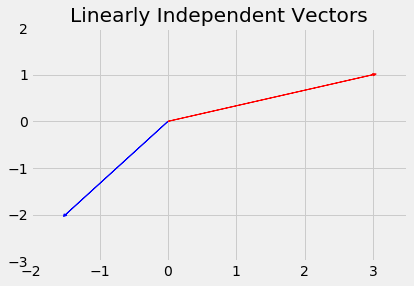

In [19]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-3,2)

# Original Vector
a = [-1.5,-2] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=1, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=1, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

In [0]:
# Basis of a vector is when the vectors are linearly independant and span the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
0 & 0 & -10
\end{bmatrix}
\end{align}

the matrix rank of P is 3

## 7.2 What does the rank of a matrix tell us?

it means that the matrix spans $\mathbb{R}^3$

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

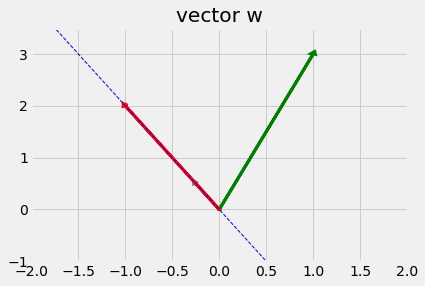

In [44]:
# Plot a line

# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-1,3.5)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [-.25,.5]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -2*x_vals


# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("vector w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

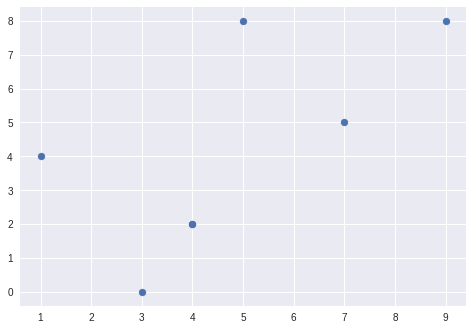

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()